# 105 数据归一化 scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### 最值归一化 Normalization

In [2]:
x = np.random.rand(100)*100

In [3]:
(x - np.min(x)) / (np.max(x)-np.min(x))

array([0.54330637, 0.63947426, 0.63019651, 0.11954453, 0.94262975,
       0.81278025, 0.        , 0.61740034, 0.46388408, 0.20269896,
       0.69352802, 0.71614032, 0.5139039 , 0.76430953, 0.41288891,
       0.44093981, 0.0335324 , 0.43880438, 0.62465978, 0.50288554,
       0.07099822, 0.9228517 , 0.25971345, 0.03485723, 0.57442794,
       0.65809345, 0.97367898, 0.78780604, 0.90403485, 0.0113428 ,
       0.41119447, 0.72788986, 0.81641231, 0.93500768, 0.06658069,
       0.31532281, 0.31464795, 0.79749458, 0.86051432, 0.45224857,
       0.86373185, 0.51611389, 0.81142788, 0.74467003, 0.11979219,
       0.19809179, 0.58292046, 0.60915012, 0.42637812, 0.28555073,
       0.52079764, 0.49697868, 0.78921221, 0.53089647, 0.74436941,
       0.43293309, 0.61023863, 0.71848769, 0.25020804, 0.98497382,
       0.0144688 , 0.4287929 , 0.09935889, 0.32719967, 0.66455291,
       0.90262883, 0.2549491 , 0.30981862, 0.52087242, 0.73998139,
       0.86554432, 0.40662587, 0.75366391, 0.20513218, 0.36076

In [4]:
X = np.random.rand(50,2)*100

In [5]:
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i])-np.min(X[:,i]))

In [6]:
X[:10,:]

array([[0.20321047, 0.40656989],
       [0.16446299, 0.55739914],
       [0.91115234, 0.34977501],
       [0.33742797, 0.174463  ],
       [0.08285905, 0.05223581],
       [0.78423354, 0.57382615],
       [0.52815341, 0.21255855],
       [0.96099599, 0.30153482],
       [0.35052099, 0.95022723],
       [0.        , 0.43567973]])

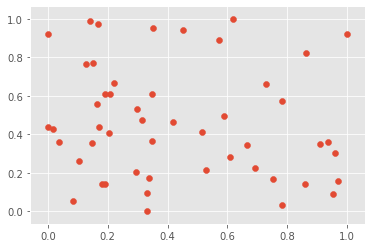

In [7]:
plt.scatter(X[:,0], X[:,1])

### 均值方差归一化 Standardization

In [8]:
X2 = np.random.randint(0, 100, (50,2))
X2 = np.array(X2, dtype=float)

In [9]:
for i in range(X.shape[1]):
    X2[:,i] = (X2[:,i] - np.mean(X2[:,i])) / np.std(X2[:,i])

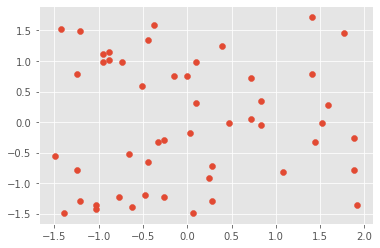

In [10]:
plt.scatter(X2[:,0], X2[:,1])

In [11]:
print("第一列均值：%f,方差：%f ,第二列均值：%f,方差：%f" % (np.mean(X2[:,0]), np.std(X2[:,0]), np.mean(X2[:,1]), np.std(X2[:,1])))

第一列均值：-0.000000,方差：1.000000 ,第二列均值：0.000000,方差：1.000000


### 对于测试数据集，要通过<font color='red'>测试训练集</font>的均值和方差进行归一化

### Scikit-learn中的Scaler

In [12]:
import numpy as np
from sklearn import datasets

In [13]:
iris = datasets.load_iris()

In [14]:
X = iris.data
y = iris.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

### ## Scikit-learn中的StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

standardScalar = StandardScaler()

In [17]:
standardScalar.fit(X_train)
print(standardScalar.mean_)
print(standardScalar.scale_)

[5.83416667 3.08666667 3.70833333 1.17      ]
[0.81019502 0.44327067 1.76401924 0.75317107]


In [18]:
X_train = standardScalar.transform(X_train)

In [19]:
X_test_standard = standardScalar.transform(X_test)

### 使用归一化后的数据进行knn分类

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
knn_clf.score(X_train, y_train)

0.95

In [22]:
knn_clf.score(X_test_standard, y_test)

1.0

### 实现自己的standardScalar
代码参见：[这里](./code/playML/preprocessing.py)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [24]:
import sys
sys.path.insert(0,'./code')
from playML.preprocessing import StandardScaler

my_standardScalar = StandardScaler()
my_standardScalar.fit(X_train)
print(my_standardScalar.mean_)
print(my_standardScalar.scale_)

[5.83416667 3.08666667 3.70833333 1.17      ]
[0.81019502 0.44327067 1.76401924 0.75317107]


In [25]:
X_train = my_standardScalar.transform(X_train)
X_test = my_standardScalar.transform(X_test)

In [26]:
X_train[:10,:]

array([[-0.90616043,  0.93246262, -1.30856471, -1.28788802],
       [-1.15301457, -0.19551636, -1.30856471, -1.28788802],
       [-0.16559799, -0.64670795,  0.22203084,  0.17260355],
       [ 0.45153738,  0.70686683,  0.95898425,  1.50032315],
       [-0.90616043, -1.32349533, -0.40154513, -0.09294037],
       [ 1.43895396,  0.25567524,  0.56216318,  0.30537551],
       [ 0.3281103 , -1.09789954,  1.0723617 ,  0.30537551],
       [ 2.1795164 , -0.19551636,  1.63924894,  1.23477923],
       [-0.78273335,  2.2860374 , -1.25187599, -1.42065998],
       [ 0.45153738, -2.00028272,  0.44878573,  0.43814747]])

### Scikit-Learn中的最值归一化
MinMaxScaler: [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)